In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
import os

In [3]:

origPath = '/home/ubuntu/kaggle/breast/'

foldersNL = os.listdir(origPath)

listofPaths0 = []
listofPaths1 = []

for folderName in foldersNL:
    allfilesinFN0 = os.listdir(origPath + folderName + '/0')
    allfilesinFN1 = os.listdir(origPath + folderName + '/1')
    
    for pic in allfilesinFN0:
        listofPaths0.append(Path(origPath + folderName + '/0/' + pic))
    for pic in allfilesinFN1:
        listofPaths1.append(Path(origPath + folderName + '/1/' + pic))

In [4]:
listofAll = []
i = 0
while i < 1000:
    listofAll.append(listofPaths0[i])
    i += 1
i = 0
while i < 1000:
    listofAll.append(listofPaths1[i])
    i += 1

In [5]:
len(listofAll)

2000

In [6]:
labels = [('0' if '/0/' in str(x) else '1') for x in listofAll]
tfms = get_transforms(do_flip=False)
# valid_pct=.1 is like 10% of pictures for validation set
# test_pct=.5 says use 50% for test set 
data = ImageDataBunch.from_lists(origPath, listofAll, labels=labels, ds_tfms=get_transforms(), valid_pct=.1, test_pct=.5, size=50, bs=16)
data.classes

['0', '1']

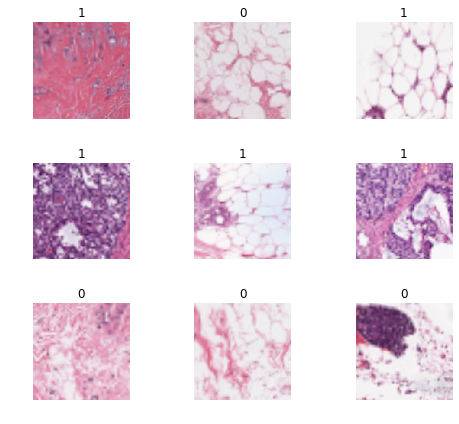

In [7]:
data.show_batch(rows=3, figsize=(7,6))

In [64]:
print(data.classes)
len(data.classes), data.c

['0', '1']


(2, 2)

In [65]:
learn = create_cnn(data, models.resnet34, metrics=[error_rate, accuracy], model_dir="../")

In [ ]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,accuracy
1,0.586972,1.202689,0.475000,0.525000
2,0.533474,0.930477,0.365000,0.635000
3,0.463173,1.105143,0.455000,0.545000


In [ ]:
doc(create_cnn)